In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


        

/kaggle/input/adult-census-income/adult.csv


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [5]:
ad_df3 = pd.read_csv('../input/adult-census-income/adult.csv')

In [6]:
ad_df3.shape

(32561, 15)

In [7]:
ad_df3.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [8]:
ad_df3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:

ad_df3.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Conclusion**

Age: Range from 19 to 90 years, average is 37.

Education_num: from 1 and 16 ,the avg education level is 10 years.

hours.per.week:from 1 and 99, and the average is 40 hours.

----


# 3.DataCleanning

In [10]:

ad_df3 = ad_df3.rename(columns={'capital.gain':'capital-gain','marital.status':'marital-status',
                      'capital.loss':'capital-loss','hours.per.week':'hours-per-week',
                      'native.country':'native-country'})

In [11]:
ad_df3.head()

,age,workclass,fnlwgt,education,education.num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:

ad_df3[ad_df3 == '?'] = np.nan
ad_df3.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [13]:

for col in ['workclass', 'occupation', 'native-country']:
    ad_df3[col].fillna(ad_df3[col].mode()[0], inplace = True)
ad_df3.head(5)

,age,workclass,fnlwgt,education,education.num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# 5. Feauture Engineerning

## 5.3.1 Process Outlier

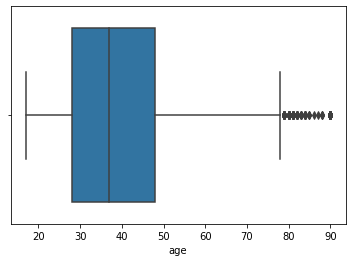

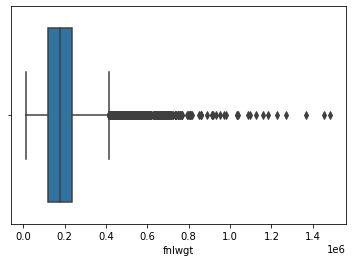

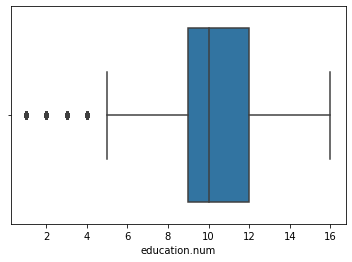

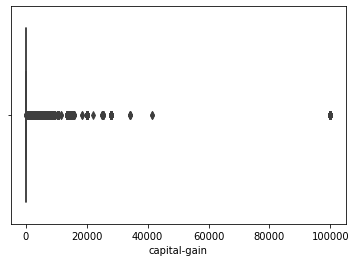

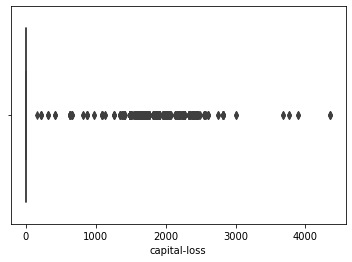

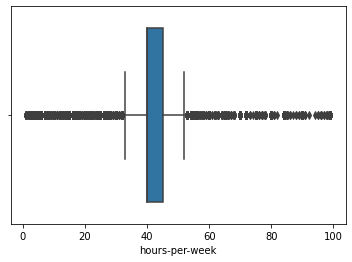

In [14]:

int_columns = ['age','fnlwgt','education.num','capital-gain','capital-loss','hours-per-week']
for i in int_columns:
  sns.boxplot(x = ad_df3[i])
  plt.show()

In [15]:

LQ = ad_df3["fnlwgt"].quantile(0.01)
HQ  = ad_df3["fnlwgt"].quantile(0.99)
ad_df = ad_df3[(ad_df3["fnlwgt"] < HQ) & (ad_df3["fnlwgt"] > LQ)]

In [16]:
print(len(ad_df3), len(ad_df3))
print(LQ, HQ)

32561 32561
27185.8 510072.0


In [17]:
ad_df['education.num'].value_counts()

9     10295
10     7125
13     5252
14     1687
11     1353
7      1157
12     1054
6       908
4       632
15      572
5       503
8       421
16      408
3       327
2       164
1        49
Name: education.num, dtype: int64

In [18]:


ad_df = ad_df[(ad_df['education.num'] <= 16) & (ad_df['education.num'] >= 4)]
ad_df= ad_df[ad_df['capital-gain'] <= 60000]
ad_df= ad_df[ad_df['capital-loss'] <= 3000]
ad_df= ad_df[(ad_df['hours-per-week'] <= 80) & (ad_df['hours-per-week'] >= 20)]

In [19]:
ad_df.shape

(29372, 15)

In [20]:
ad_df3.shape

(32561, 15)

## 5.1 Feature combination and dropout

In [21]:
ad_df.head()

,age,workclass,fnlwgt,education,education.num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
13,32,Private,136204,Masters,14,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,>50K
14,51,Private,172175,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,>50K
15,46,Private,45363,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,>50K


In [22]:
ad_df = ad_df.drop(['education.num'], axis=1)
ad_df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11,38,Self-emp-not-inc,164526,Prof-school,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K
13,32,Private,136204,Masters,Separated,Exec-managerial,Not-in-family,White,Male,0,2824,55,United-States,>50K
14,51,Private,172175,Doctorate,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,>50K
15,46,Private,45363,Prof-school,Divorced,Prof-specialty,Not-in-family,White,Male,0,2824,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [23]:
ad_df3 = ad_df3.drop(['education.num'], axis=1)
ad_df3

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,90,Private,77053,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [24]:
print('** Edu **:',ad_df.education.unique(), '\n',
      '** Race **:',ad_df.race.unique(),'\n',
      '** Occupation **:',ad_df.occupation.unique(),'\n',
     '** Relationship **:',ad_df.relationship.unique(),'\n',
     '** Sex **:',ad_df.sex.unique(),'\n',
      '** Marital-status **:' , ad_df['marital-status'].unique(),'\n',
      '** native-country **:', ad_df['native-country'].unique()
     )


** Edu **: ['Prof-school' 'Bachelors' 'Masters' 'Doctorate' '11th' 'Assoc-acdm'
 'HS-grad' 'Some-college' 'Assoc-voc' '10th' '12th' '9th' '7th-8th'] 
 ** Race **: ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 
 ** Occupation **: ['Prof-specialty' 'Other-service' 'Exec-managerial' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Craft-repair' 'Adm-clerical'
 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Machine-op-inspct'
 'Armed-Forces' 'Priv-house-serv'] 
 ** Relationship **: ['Not-in-family' 'Unmarried' 'Husband' 'Wife' 'Other-relative' 'Own-child'] 
 ** Sex **: ['Male' 'Female'] 
 ** Marital-status **: ['Never-married' 'Widowed' 'Separated' 'Divorced' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] 
 ** native-country **: ['United-States' 'Vietnam' 'China' 'Greece' 'Taiwan' 'India' 'Philippines'
 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands' 'Puerto-Rico'
 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong' 'Honduras'
 

### Categorical Feature Combining

In [25]:

ad_df['education'].replace([ 'Preschool', '1st-4th','5th-6th','7th-8th','9th', '10th','11th',  '12th'],
                             'Drop_at_School_level', inplace = True)
ad_df['education'].replace(['Some-college','Assoc-acdm','Assoc-voc' ],'College',inplace=True)

ad_df['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse' ],'Married-spouse',inplace=True)

ad_df['native-country'].replace(['England','Scotland'],'UK',inplace=True)
ad_df['native-country'].replace(['Portugal','Germany','Italy','Yugoslavia','Hungary',
                                'Greece', 'Poland','France' ,'Holand-Netherlands'],'Other-Europe',inplace=True)
ad_df['native-country'].replace(['Philippines','Vietnam','Thailand','Cambodia','Laos','Japan','India','Iran'],'Other-Asia',inplace=True)
ad_df['native-country'].replace(['United-States','Puerto-Rico','Outlying-US(Guam-USVI-etc)','Canada'],'North-America',inplace=True)
ad_df['native-country'].replace(['China','Taiwan','Hong'],'China',inplace=True)
ad_df['native-country'].replace(['Peru','Mexico','Dominican-Republic','Haiti',
                              'Cuba','Guatemala','Columbia','Nicaragua', 'Honduras',
                               'Jamaica' ,'Ecuador','El-Salvador','Trinadad&Tobago'] , 'Latin-America',inplace=True)

In [26]:

ad_df3['education'].replace([ 'Preschool', '1st-4th','5th-6th','7th-8th','9th', '10th','11th',  '12th'],
                             'Drop_at_School_level', inplace = True)
ad_df3['education'].replace(['Some-college','Assoc-acdm','Assoc-voc' ],'College',inplace=True)

ad_df3['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse' ],'Married-spouse',inplace=True)

ad_df3['native-country'].replace(['England','Scotland'],'UK',inplace=True)
ad_df3['native-country'].replace(['Portugal','Germany','Italy','Yugoslavia','Hungary',
                                'Greece', 'Poland','France' ,'Holand-Netherlands'],'Other-Europe',inplace=True)
ad_df3['native-country'].replace(['Philippines','Vietnam','Thailand','Cambodia','Laos','Japan','India','Iran'],'Other-Asia',inplace=True)
ad_df3['native-country'].replace(['United-States','Puerto-Rico','Outlying-US(Guam-USVI-etc)','Canada'],'North-America',inplace=True)
ad_df3['native-country'].replace(['China','Taiwan','Hong'],'China',inplace=True)
ad_df3['native-country'].replace(['Peru','Mexico','Dominican-Republic','Haiti',
                              'Cuba','Guatemala','Columbia','Nicaragua', 'Honduras',
                               'Jamaica' ,'Ecuador','El-Salvador','Trinadad&Tobago'] , 'Latin-America',inplace=True)

### Continuous Feature Binning

In [27]:

def Binning(df,col,method,bins):

    uniqs=df[col].nunique()
    if uniqs<=bins:
        raise KeyError('nunique is smaller than bins: '+col)
        return 

    def ff(x,fre_list):
        if x<=fre_list[0]:
            return 0
        elif x>fre_list[-1]:
            return len(fre_list)-1
        else :
            for i in range(len(fre_list)-1):
                if x>fre_list[i] and x<=fre_list[i+1]:
                    return i

    if method=='distance':
        umax=np.percentile(df[col],99.99)
        umin=np.percentile(df[col],0.01)
        step=(umax-umin)/bins
        fre_list=[umin+i*step for i in range(bins+1)]
        return df[col].map(lambda x:ff(x,fre_list))

    elif method=='frequency' :
        fre_list=[np.percentile(df[col],100/bins*i) for i in range(bins+1)]
        fre_list=sorted(list(set(fre_list)))
        return df[col].map(lambda x:ff(x,fre_list))


In [28]:
ad_df['fnlwgt'] = Binning(df = ad_df, col = 'fnlwgt',method='frequency',bins=5)

In [29]:
ad_df3['fnlwgt'] = Binning(df = ad_df3, col = 'fnlwgt',method='frequency',bins=5)

In [30]:
ad_df['age'] = Binning(df = ad_df, col = 'age',method='frequency',bins=5)

In [31]:
ad_df3['age'] = Binning(df = ad_df3, col = 'age',method='frequency',bins=5)

In [32]:
ad_df['hours-per-week'] = Binning(df = ad_df, col = 'hours-per-week',method='distance',bins=5)

In [33]:
ad_df3['hours-per-week'] = Binning(df = ad_df3, col = 'hours-per-week',method='distance',bins=5)

In [34]:
[np.percentile(ad_df['hours-per-week'],100/5*i) for i in range(5+1)]


[0.0, 1.0, 1.0, 1.0, 2.0, 4.0]

In [35]:
print('Fnlwgt',ad_df['fnlwgt'].value_counts())
print('Age',ad_df['age'].value_counts())
print('hours-per-week',ad_df['hours-per-week'].value_counts())


Fnlwgt 0    5875
4    5875
2    5874
1    5874
3    5874
Name: fnlwgt, dtype: int64
Age 2    6327
0    6172
3    5770
1    5589
4    5514
Name: age, dtype: int64
hours-per-week 1    17302
2     6111
0     3648
3     1768
4      543
Name: hours-per-week, dtype: int64


In [36]:
ad_df.loc[ad_df['capital-gain']!=0, 'capital-gain'] = Binning(df = ad_df[ad_df['capital-gain']!=0], col = 'capital-gain', method = 'frequency', bins = 4) + 1
ad_df['capital-gain'].value_counts()

0    27004
1      609
3      591
4      584
2      584
Name: capital-gain, dtype: int64

In [37]:
ad_df.loc[ad_df['capital-loss']!=0, 'capital-loss'] = Binning(df = ad_df[ad_df['capital-loss']!=0], col = 'capital-loss', method = 'frequency', bins = 4) + 1
ad_df['capital-loss'].value_counts()

0    27971
3      370
1      364
2      361
4      306
Name: capital-loss, dtype: int64

## 5.2 Encoding Categorical feature

In [38]:
ad_df['income']=ad_df['income'].map({'<=50K': 0, '>50K': 1})

In [39]:
ad_df3['income']=ad_df3['income'].map({'<=50K': 0, '>50K': 1})

In [40]:
from sklearn.preprocessing import LabelEncoder
categ = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country']
le = LabelEncoder()
for col in categ:
    le.fit(ad_df[col])
    ad_df[col] = le.transform(ad_df[col])

In [41]:
categ3 = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country']
le3 = LabelEncoder()
for col in categ3:
    le3.fit(ad_df3[col])
    ad_df3[col] = le3.transform(ad_df3[col])

In [42]:
ad_df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11,2,5,2,6,3,9,1,4,1,0,4,2,3,1
12,4,3,1,0,5,7,1,4,0,0,4,0,3,1
13,1,3,1,5,4,3,1,4,1,0,4,2,3,1
14,4,3,2,2,3,9,1,4,1,0,4,1,3,1
15,3,3,0,6,0,9,1,4,1,0,4,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,3,4,1,3,10,1,4,1,0,0,1,3,0
32557,1,3,4,1,1,12,5,4,0,0,0,1,3,0
32558,2,3,1,4,1,6,0,4,1,0,0,1,3,1
32559,4,3,1,4,5,0,4,4,0,0,0,1,3,0


## 5.3 Optimization of data

## 5.3.1 Hypothesis Test

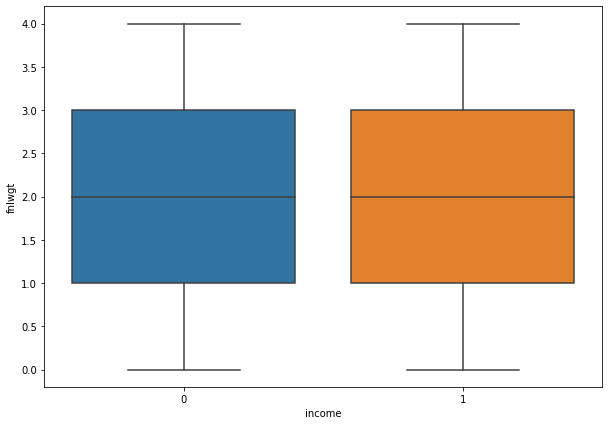

In [43]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="fnlwgt", data=ad_df)
plt.show()

In [44]:
ad_df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11,2,5,2,6,3,9,1,4,1,0,4,2,3,1
12,4,3,1,0,5,7,1,4,0,0,4,0,3,1
13,1,3,1,5,4,3,1,4,1,0,4,2,3,1
14,4,3,2,2,3,9,1,4,1,0,4,1,3,1
15,3,3,0,6,0,9,1,4,1,0,4,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,3,4,1,3,10,1,4,1,0,0,1,3,0
32557,1,3,4,1,1,12,5,4,0,0,0,1,3,0
32558,2,3,1,4,1,6,0,4,1,0,0,1,3,1
32559,4,3,1,4,5,0,4,4,0,0,0,1,3,0


In [45]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

ad_df2 = ad_df[(np.abs(stats.zscore(ad_df["fnlwgt"])) < 3)] 

income_1 = ad_df2[ad_df['income']==1]["fnlwgt"]
income_0 = ad_df2[ad_df['income']==0]["fnlwgt"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis",'\n',
    'Accept Alternative hypothesis: exist difference between two group of income(>50k and<=50k.) ')
else:
    print("we accept null hypothesis(no difference between mean of two group of income(>50k and<=50k.)")


ttest -0.7817359599705722
p-value 0.4353044901198333
we accept null hypothesis(no difference between mean of two group of income(>50k and<=50k.)


**Conclusion:**
By applying the  statistical analysis in two sample t-test,

The conclusion is that there no difference between two group of income(>50k and<=50k which means that the feature 'flnwgt' has no contribution to the classify income group.
Therefore, we decide to drop this feature.

----------

In [46]:
ad_df2=ad_df.drop(['fnlwgt'], axis=1)
ad_df2

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11,2,5,6,3,9,1,4,1,0,4,2,3,1
12,4,3,0,5,7,1,4,0,0,4,0,3,1
13,1,3,5,4,3,1,4,1,0,4,2,3,1
14,4,3,2,3,9,1,4,1,0,4,1,3,1
15,3,3,6,0,9,1,4,1,0,4,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,3,1,3,10,1,4,1,0,0,1,3,0
32557,1,3,1,1,12,5,4,0,0,0,1,3,0
32558,2,3,4,1,6,0,4,1,0,0,1,3,1
32559,4,3,4,5,0,4,4,0,0,0,1,3,0


## 5.4 Split dataset

In [47]:
from sklearn.model_selection import train_test_split
X = ad_df.drop(['income'], axis=1)
y = ad_df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


X3 =ad_df3.drop(['income'], axis=1)
y3 = ad_df3['income']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 0)

## 5.4.5 Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
y_train.index = range(len(y_train))
y_test.index = range(len(y_test))

X3_train = pd.DataFrame(scaler.fit_transform(X3_train), columns = X3.columns)
X3_test = pd.DataFrame(scaler.transform(X3_test), columns = X3.columns)
y3_train.index = range(len(y3_train))
y3_test.index = range(len(y3_test))

In [49]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape)

(20560, 13) (8812, 13) (20560,) (8812,)
(22792, 13) (9769, 13) (22792,) (9769,)


# 6. PCA

In [50]:
class myPCA:
    def __init__(self, X, n_components = None, explained_variance_ratio = 0.80):
        self.X = np.array(X)
        self.dim = self.X.shape[1]
        
        if n_components and n_components >= self.dim:
            print('Warning: Number of principal components exceeds feature dimensions!')
            
        self.n_components = n_components
        self.explained_variance_ratio = explained_variance_ratio

        self.eMat_sorted = self.get_eigenValue_eigenVector()
        self.var = self.eMat_sorted.values[:, 0]
        self.ratio = self.var / sum(self.var)


    def get_eigenValue_eigenVector(self):
        eVal, eVec = np.linalg.eig(np.cov(self.X.T))
        eMat = np.hstack((eVal.reshape((eVal.shape[0],1)), eVec))
        eMat_sorted = pd.DataFrame(eMat).sort_values(by = 0, ascending = False)

        return eMat_sorted


    def reduceDimension(self):
        pc_name = []

        if self.n_components:
          for i in range(self.n_components):
            pc_name.append('PC{}'.format(i+1))
          pc = self.eMat_sorted.values[0:self.n_components, 1:]
          Y = np.dot(pc, self.X.T)
          pc_df = pd.DataFrame(Y.T, columns = pc_name)
          
          return pc_df
        
        cumulative_ratio = 0

        for i in range(self.dim):
          cumulative_ratio += self.ratio[i]
          pc_name.append('PC{}'.format(i+1))
          if cumulative_ratio >= self.explained_variance_ratio: 
            pc = self.eMat_sorted.values[0:i+1, 1:]         
            Y = np.dot(pc, self.X.T)            
            pc_df = pd.DataFrame(Y.T, columns = pc_name)

            return pc_df

    def plotRatio(self):
        cumulative_ratio = 0
        self.cumulative_ratio = []
        for i in range(self.dim):
          cumulative_ratio += self.ratio[i]
          self.cumulative_ratio.append(cumulative_ratio)

        pc_name = []
        for i in range(self.dim):
          pc_name.append('PC{}'.format(i+1))
        plt.figure(figsize = (16, 9), dpi = 80)
        plt.bar(pc_name, self.cumulative_ratio, label = 'Cumulative')
        plt.bar(pc_name, self.ratio, color = 'orange', label = 'Individual')
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
        plt.xlabel('Principal Components', labelpad = 30, fontsize = 20)
        plt.ylabel('Proportion of Variance Explained', labelpad = 30, fontsize = 20)
        for i, j in zip(range(self.dim), self.ratio):
          plt.text(i, j+0.008, format(j, '.2%'), ha = 'center', va = 'bottom', fontsize = 12)
        for i, j in zip(range(self.dim), self.cumulative_ratio):
          plt.text(i, j+0.008, format(j, '.2%'), ha = 'center', va = 'bottom', fontsize = 12)
        plt.legend(fontsize = 'xx-large')
        plt.show()

In [51]:
mypca = myPCA(X_train, n_components = 8)


In [52]:
mypca.reduceDimension()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.492115,-1.594405,-1.550886,-1.032477,0.336719,-0.898869,2.689412,2.387272
1,1.095191,0.451912,0.592058,-0.112727,-0.858667,0.615672,-1.320136,0.495922
2,-0.078971,-0.819157,-1.158263,-0.739848,-0.987362,0.455452,-0.305619,-0.483104
3,-2.382245,1.083163,-0.692242,-1.912442,0.782018,-1.222875,2.335871,-0.391131
4,-1.459314,-0.568522,-0.906545,2.424859,-0.340325,-0.318815,0.673672,0.392214
...,...,...,...,...,...,...,...,...
20555,-0.151953,-1.423597,0.751009,0.494925,-0.028329,-0.181607,-0.718111,-1.139578
20556,-1.053635,-0.959539,-0.928404,-0.009121,-0.814125,-0.157334,-0.074174,-0.630659
20557,0.313469,-0.469574,0.861636,1.229321,0.576530,0.520337,-0.047626,0.841760
20558,0.841511,-0.405602,0.867602,1.040258,-0.910735,-0.501773,-1.569207,0.080149


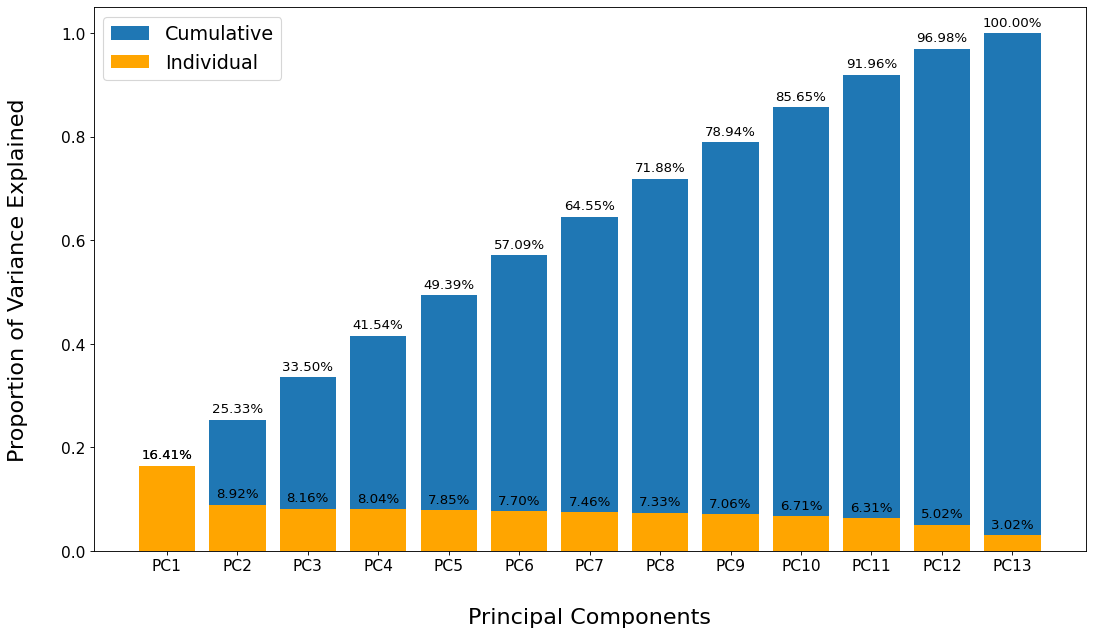

In [53]:
mypca.plotRatio()

In [54]:
X2 =ad_df2.drop(['income','hours-per-week',	'native-country'], axis=1)
y2 = ad_df2['income']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

In [55]:
X2_train = pd.DataFrame(scaler.fit_transform(X2_train), columns = X2.columns)
X2_test = pd.DataFrame(scaler.transform(X2_test), columns = X2.columns)
y2_train.index = range(len(y2_train))
y2_test.index = range(len(y2_test))

In [56]:
print(X3_train.shape)
print(X_train.shape)
print(X2_train.shape)

(22792, 13)
(20560, 13)
(20560, 10)


# 7. Logistic Regression

In [57]:
from tqdm import tqdm

In [58]:
class LogisitcRegression:
  def __init__(
      self, 
      X_train, y_train, X_test, y_test, 
      learningRate = 0.01, 
      tolerance = 0.001, 
      maxIteration = 1000
  ) -> None:
    self.X_train = np.array(X_train)
    self.y_train = np.array(y_train)
    self.X_test = np.array(X_test)
    self.y_test = np.array(y_test)
    self.learningRate = learningRate
    self.tolerance = tolerance
    self.maxIteration = maxIteration

  
  def sigmoid(self, z):
    sig = 1/ (1+ np.exp(-z))
    return sig

  def costFunction(self):
    sig = self.sigmoid(self.X_train.dot(self.w))
    pred = self.y_train * np.log(sig) + (1-self.y_train) * np.log(1- sig)
    cost = - pred.sum()

    return cost

  def gradient(self):
    sig = self.sigmoid(self.X_train.dot(self.w))
    grad = (sig - self.y_train).dot(self.X_train)
    return grad

  def gradientDescent(self):
    errors = []
    last_error = float('inf')

    for i in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate * self.gradient()
      current_error = self.costFunction()
      diff = last_error - current_error
      last_error = current_error
      errors.append(current_error)
      
      if diff < self.tolerance:
        print('Model stopped learning')
        break
    return
  

  def fit(self):
    print('Solving using gradient descent')
    self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
    self.gradientDescent()

    self.y_test_hat = self.predict()
    accurancy, precision, recall, F1_score = self.evaluate()
    
    print('')
    print('Accurancy is {}.'.format(accurancy))
    print('Precision is {}.'.format(precision))
    print('Recall is {}.'.format(recall))
    print('F1 Score is {}'.format(F1_score))
  

  def predict(self):
    sig = self.sigmoid(self.X_test.dot(self.w))

    return np.around(sig)


  def evaluate(self):
    accurancy = (np.array(self.y_test_hat, dtype = np.int64) == np.array(self.y_test)).sum() / len(self.y_test_hat)
    precision = (np.array(self.y_test_hat, dtype = np.int64) & np.array(self.y_test)).sum() / sum(self.y_test_hat)
    recall = (np.array(self.y_test_hat, dtype = np.int64) & np.array(self.y_test)).sum() / sum(self.y_test)
    F1_score = 2*precision*recall / (precision + recall)

    return accurancy, precision, recall, F1_score

In [59]:
lr = LogisitcRegression(X_train, y_train, X_test, y_test, learningRate = 0.01, tolerance = 0.001, maxIteration = 1000)
lr2 = LogisitcRegression(X2_train, y2_train, X2_test, y2_test, learningRate = 0.01, tolerance = 0.001, maxIteration = 1000)
lr3 = LogisitcRegression(X3_train, y3_train, X3_test, y3_test, learningRate = 0.01, tolerance = 0.001, maxIteration = 1000)

In [60]:
lr.fit()

Solving using gradient descent


100%|██████████| 1000/1000 [00:02<00:00, 426.40it/s]


Accurancy is 0.6950748978665456.
Precision is 0.4416885284998808.
Recall is 0.8425841674249318.
F1 Score is 0.5795650132999531


In [61]:
lr2.fit()

Solving using gradient descent


100%|██████████| 1000/1000 [00:02<00:00, 421.24it/s]


Accurancy is 0.6965501588742624.
Precision is 0.44206426484907496.
Recall is 0.8262056414922657.
F1 Score is 0.5759594037424675


In [62]:
lr3.fit()

Solving using gradient descent


100%|██████████| 1000/1000 [00:02<00:00, 390.36it/s]


Accurancy is 0.6698740915139728.
Precision is 0.4112341123411234.
Recall is 0.8503603221704112.
F1 Score is 0.5543733591267099


# 8. Gaussian Naive Bayes

In [63]:
from scipy.stats import norm

In [64]:
class GaussianNaiveBayes:
  def __init__(self, X_train, y_train, X_test, y_test) -> None:
      self.X_train = np.array(X_train)
      self.y_train = np.array(y_train)
      self.X_test = np.array(X_test)
      self.y_test = np.array(y_test)

  
  def fitDistribution(self, data):
    mean = np.mean(data)
    std = np.std(data)
    dist = norm(mean, std)
    return dist

  
  def probability(self, x, prior, dist):
    prob = prior

    for i, d in enumerate(dist):
      prob *= d.pdf(x[i])

    return prob


  def fit(self):
    X0_train = self.X_train[self.y_train == 0]           
    X1_train = self.X_train[self.y_train == 1]          

    self.prior0 = len(X0_train) / len(self.X_train)
    self.prior1 = len(X1_train) / len(self.X_train)

    self.X0_dist = np.array([])
    self.X1_dist = np.array([])

    for i in range(self.X_train.shape[1]):
      X0_dist_i = self.fitDistribution(X0_train[:, i])              
      X1_dist_i = self.fitDistribution(X1_train[:, i])               

      self.X0_dist = np.append(self.X0_dist, X0_dist_i)
      self.X1_dist = np.append(self.X1_dist, X1_dist_i)


  def predict(self):
    self.pred = []
    self.actual = []
    for sample, target in zip(self.X_test, self.y_test):
      py0 = self.probability(sample, self.prior0, self.X0_dist)
      py1 = self.probability(sample, self.prior1, self.X1_dist)
      z = py0 + py1

      self.pred.append(np.argmax([py0, py1]))
      self.actual.append(target)


  def score(self):
    self.accuracy = (np.array(self.pred) == np.array(self.actual)).sum() / len(self.pred)
    self.precision = (np.array(self.pred) & np.array(self.actual)).sum() / sum(self.pred)
    self.recall = (np.array(self.pred) & np.array(self.actual)).sum() / sum(self.actual)
    self.F1_score = 2*self.precision*self.recall / (self.precision + self.recall)

    print('Accuracy is {}.'.format(self.accuracy))
    print('Precision is {}.'.format(self.precision))
    print('Recall is {}.'.format(self.recall))
    print('F1 Score is {}'.format(self.F1_score))

In [65]:
clf = GaussianNaiveBayes(X_train, y_train, X_test, y_test)
clf.fit()
clf.predict()

clf2 = GaussianNaiveBayes(X2_train, y2_train, X2_test, y2_test)
clf2.fit()
clf2.predict()

clf3 = GaussianNaiveBayes(X3_train, y3_train, X3_test, y3_test)
clf3.fit()
clf3.predict()

In [66]:
clf_test = GaussianNaiveBayes(X3_train, y3_train, X3_train, y3_train)
clf_test.fit()
clf_test.predict()
clf_test.score()

Accuracy is 0.7984819234819235.
Precision is 0.6644469108398077.
Recall is 0.32761765778912805.
F1 Score is 0.4388515577275504


In [67]:
clf.score()
print('')
clf2.score()
print('')
clf3.score()

Accuracy is 0.7943713118474807.
Precision is 0.6425406203840472.
Recall is 0.3958143767060964.
F1 Score is 0.4898648648648648

Accuracy is 0.7939173853835678.
Precision is 0.6720720720720721.
Recall is 0.3393994540491356.
F1 Score is 0.45102781136638453

Accuracy is 0.7968062237690654.
Precision is 0.6669642857142857.
Recall is 0.31665960152607037.
F1 Score is 0.42943374532911754


# 9. Decision Tree

In [68]:

import random 


from collections import Counter


class DecisionTree: 
    """
    Class for creating the nodes for a decision tree 
    """
    def __init__(
        self, 
        Y: list,
        X: pd.DataFrame,
        min_samples_split=None,
        max_depth=None,
        depth=None,
        X_features_fraction=None,
        node_type=None,
        rule=None
    ):
      
        self.Y = Y 
        self.X = X

        
        self.min_samples_split = min_samples_split if min_samples_split else 20
        self.max_depth = max_depth if max_depth else 5


        
        self.depth = depth if depth else 0

        
        self.features = list(self.X.columns)

        
        self.X_features_fraction = X_features_fraction if X_features_fraction is not None else 1.0

        
        self.node_type = node_type if node_type else 'root'

       
        self.rule = rule if rule else ""

       
        self.counts = Counter(Y)

       
        self.gini_impurity = self.get_GINI()

      
        counts_sorted = list(sorted(self.counts.items(), key=lambda item: item[1]))

  
        yhat = None
        if len(counts_sorted) > 0:
            yhat = counts_sorted[-1][0]

       
        self.yhat = yhat

        self.n = len(Y)

        self.left = None 
        self.right = None 

        self.best_feature = None 
        self.best_value = None 

    def get_random_X_colsample(self):

      n_ft = int(self.n_features * self.X_features_fraction)


      features = random.sample(self.features, n_ft)

  
      X = self.X[features].copy()


      return X 

    @staticmethod
    def GINI_impurity(y1_count: int, y2_count: int) -> float:
        """
        Given the observations of a binary class calculate the GINI impurity
        """
       
        if y1_count is None:
            y1_count = 0

        if y2_count is None:
            y2_count = 0

    
        n = y1_count + y2_count
        
       
        if n == 0:
            return 0.0


        p1 = y1_count / n
        p2 = y2_count / n
        

        gini = 1 - (p1 ** 2 + p2 ** 2)
        

        return gini

    @staticmethod
    def ma(x: np.array, window: int) -> np.array:
        """
        Calculates the moving average of the given list. 
        """
        return np.convolve(x, np.ones(window), 'valid') / window

    def get_GINI(self):
        """
        Function to calculate the GINI impurity of a node 
        """

        y1_count, y2_count = self.counts.get(0, 0), self.counts.get(1, 0)

      
        return self.GINI_impurity(y1_count, y2_count)

    def best_split(self) -> tuple:
        """
        Given the X features and Y targets calculates the best split 
        for a decision tree
        """
        
        df = self.X.copy()
        df['Y'] = self.Y

        GINI_base = self.get_GINI()

        max_gain = 0

        best_feature = None
        best_value = None

        for feature in self.features:
           
            Xdf = df.dropna().sort_values(feature)

            xmeans = self.ma(Xdf[feature].unique(), 2)

            for value in xmeans:
        
                left_counts = Counter(Xdf[Xdf[feature]<value]['Y'])
                right_counts = Counter(Xdf[Xdf[feature]>=value]['Y'])

              
                y0_left, y1_left, y0_right, y1_right = left_counts.get(0, 0), left_counts.get(1, 0), right_counts.get(0, 0), right_counts.get(1, 0)

                
                gini_left = self.GINI_impurity(y0_left, y1_left)
                gini_right = self.GINI_impurity(y0_right, y1_right)

             
                n_left = y0_left + y1_left
                n_right = y0_right + y1_right

               
                w_left = n_left / (n_left + n_right)
                w_right = n_right / (n_left + n_right)

                
                wGINI = w_left * gini_left + w_right * gini_right

         
                GINIgain = GINI_base - wGINI

             
                if GINIgain > max_gain:
                    best_feature = feature
                    best_value = value 

                 
                    max_gain = GINIgain

        return (best_feature, best_value)


    def grow_tree(self):
        """
        Recursive method to create the decision tree
        """
       
        df = self.X.copy()
        df['Y'] = self.Y

         
        if (self.depth < self.max_depth) and (self.n >= self.min_samples_split):

           
            best_feature, best_value = self.best_split()

            if best_feature is not None:
              
              self.best_feature = best_feature
              self.best_value = best_value

              if self.best_feature is not None:
                
                left_df, right_df = df[df[best_feature]<=best_value].copy(), df[df[best_feature]>best_value].copy()

                
                left = DecisionTree(
                    left_df['Y'].values.tolist(), 
                    left_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split, 
                    node_type='left_node',
                    rule=f"{best_feature} <= {round(best_value, 3)}"
                    )

                self.left = left 
                self.left.grow_tree()

                right = DecisionTree(
                    right_df['Y'].values.tolist(), 
                    right_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split,
                    node_type='right_node',
                    rule=f"{best_feature} > {round(best_value, 3)}"
                    )

                self.right = right
                self.right.grow_tree()


    def print_info(self, width=4):
        """
        Method to print the infromation about the tree
        """
        
        const = int(self.depth * width ** 1.5)
        spaces = "-" * const
        
        if self.node_type == 'root':
            print("Root")
        else:
            print(f"|{spaces} Split rule: {self.rule}")
        print(f"{' ' * const}   | GINI impurity of the node: {round(self.gini_impurity, 2)}")
        print(f"{' ' * const}   | Class distribution in the node: {dict(self.counts)}")
        print(f"{' ' * const}   | Predicted class: {self.yhat}")   

    def print_tree(self):
        """
        Prints the whole tree from the current node to the bottom
        """
        self.print_info() 
        
        if self.left is not None: 
            self.left.print_tree()
        
        if self.right is not None:
            self.right.print_tree()

    def predict(self, X:pd.DataFrame, y):
        """
        Batch prediction method
        """
        self.pred = []
        self.actual = list(y)

        for _, x in X.iterrows():
            values = {}
            for feature in self.features:
                values.update({feature: x[feature]})
        
            self.pred.append(self.predict_obs(values))
        

    def predict_obs(self, values: dict) -> int:
        """
        Method to predict the class given a set of features
        """
        cur_node = self
        while cur_node.depth < cur_node.max_depth:
           
            best_feature = cur_node.best_feature
            best_value = cur_node.best_value

            if best_feature is None:
              return cur_node.yhat

            if cur_node.n < cur_node.min_samples_split:
                break

            if (values.get(best_feature) < best_value):
                if self.left is not None:
                    cur_node = cur_node.left
            else:
                if self.right is not None:
                    cur_node = cur_node.right
            
        return cur_node.yhat
    
    def score(self):
      self.accuracy = (np.array(self.pred) == np.array(self.actual)).sum() / len(self.pred)
      self.precision = (np.array(self.pred) & np.array(self.actual)).sum() / sum(self.pred)
      self.recall = (np.array(self.pred) & np.array(self.actual)).sum() / sum(self.actual)
      self.F1_score = 2*self.precision*self.recall / (self.precision + self.recall)

      print('Accuracy is {}.'.format(self.accuracy))
      print('Precision is {}.'.format(self.precision))
      print('Recall is {}.'.format(self.recall))
      print('F1 Score is {}'.format(self.F1_score))

## Create Tree

In [69]:

hp = {
    'max_depth': 8,
    'min_samples_split': 500
}

In [70]:

dt = DecisionTree(list(y_train), X_train, **hp)

dt.grow_tree()

dt.print_tree()

Root
   | GINI impurity of the node: 0.37
   | Class distribution in the node: {1: 5131, 0: 15429}
   | Predicted class: 0
|-------- Split rule: relationship <= -0.573
           | GINI impurity of the node: 0.5
           | Class distribution in the node: {1: 3857, 0: 4609}
           | Predicted class: 0
|---------------- Split rule: capital-gain <= 3.092
                   | GINI impurity of the node: 0.49
                   | Class distribution in the node: {0: 4603, 1: 3318}
                   | Predicted class: 0
|------------------------ Split rule: education <= -1.063
                           | GINI impurity of the node: 0.46
                           | Class distribution in the node: {1: 931, 0: 512}
                           | Predicted class: 1
|-------------------------------- Split rule: capital-loss <= 2.421
                                   | GINI impurity of the node: 0.47
                                   | Class distribution in the node: {1: 811, 0: 504}
       

In [71]:

dt2 = DecisionTree(list(y2_train), X2_train, **hp)

dt2.grow_tree()

dt2.print_tree()

Root
   | GINI impurity of the node: 0.37
   | Class distribution in the node: {1: 5131, 0: 15429}
   | Predicted class: 0
|-------- Split rule: relationship <= -0.573
           | GINI impurity of the node: 0.5
           | Class distribution in the node: {1: 3857, 0: 4609}
           | Predicted class: 0
|---------------- Split rule: capital-gain <= 3.092
                   | GINI impurity of the node: 0.49
                   | Class distribution in the node: {0: 4603, 1: 3318}
                   | Predicted class: 0
|------------------------ Split rule: education <= -1.063
                           | GINI impurity of the node: 0.46
                           | Class distribution in the node: {1: 931, 0: 512}
                           | Predicted class: 1
|-------------------------------- Split rule: capital-loss <= 2.421
                                   | GINI impurity of the node: 0.47
                                   | Class distribution in the node: {1: 811, 0: 504}
       

In [72]:

dt3 = DecisionTree(list(y3_train), X3_train, **hp)

dt3.grow_tree()

dt3.print_tree()

Root
   | GINI impurity of the node: 0.37
   | Class distribution in the node: {0: 17310, 1: 5482}
   | Predicted class: 0
|-------- Split rule: relationship <= -0.588
           | GINI impurity of the node: 0.49
           | Class distribution in the node: {1: 4143, 0: 5110}
           | Predicted class: 0
|---------------- Split rule: capital-gain <= 0.55
                   | GINI impurity of the node: 0.48
                   | Class distribution in the node: {1: 3414, 0: 5100}
                   | Predicted class: 0
|------------------------ Split rule: capital-loss <= 4.199
                           | GINI impurity of the node: 0.47
                           | Class distribution in the node: {1: 2995, 0: 5026}
                           | Predicted class: 0
|-------------------------------- Split rule: education <= -1.083
                                   | GINI impurity of the node: 0.48
                                   | Class distribution in the node: {1: 813, 0: 548}
     

## Predict

In [73]:
dt.predict(X_test, y_test)
dt.score()

Accuracy is 0.841239219246482.
Precision is 0.7697501688048616.
Recall is 0.5186533212010919.
F1 Score is 0.6197336232671922


In [74]:
dt2.predict(X2_test, y2_test)
dt2.score()

Accuracy is 0.8396504766227871.
Precision is 0.775052557813595.
Recall is 0.5031847133757962.
F1 Score is 0.6102068965517241


In [75]:
dt3.predict(X3_test, y3_test)
dt3.score()

Accuracy is 0.8449175964786569.
Precision is 0.7425287356321839.
Recall is 0.5476896990250106.
F1 Score is 0.6303976579653574


# 10. Random Forest

In [76]:
from tqdm import tqdm

class RandomForestClassifier():
    """
    Class that creates a random forest for classification problems
    """
    def __init__(
        self,
        Y: list,
        X: pd.DataFrame,
        min_samples_split=None,
        max_depth=None,
        n_trees=None,
        X_features_fraction=None,
        X_obs_fraction=None
    ):  
    
        self.Y = Y 
        self.X = X

        
        self.min_samples_split = min_samples_split if min_samples_split else 20
        self.max_depth = max_depth if max_depth else 5

       
        self.features = list(X.columns)

        
        self.n_features = len(self.features)

        
        self.n_trees = n_trees if n_trees is not None else 30
        self.X_features_fraction = X_features_fraction if X_features_fraction is not None else 1.0
        self.X_obs_fraction = X_obs_fraction if X_obs_fraction is not None else 1.0

    def bootstrap_sample(self):
        """
        Function that creates a bootstraped sample with the class instance parameters 
        """
       
        Xbootstrap = self.X.sample(frac=self.X_obs_fraction, replace=True) 

        
        indexes = Xbootstrap.index

        
        Ybootstrap = [self.Y[x] for x in indexes]

        
        Xbootstrap.reset_index(inplace=True, drop=True)

       
        return Xbootstrap, Ybootstrap

    def grow_random_forest(self):
        """
        Main method of the class; Creates **n_trees** random trees
        """
        
        random_forest = []

         
        for _ in tqdm(range(self.n_trees)):
            
            X, Y = self.bootstrap_sample()
            
            
            tree = DecisionTree(
                Y=Y, 
                X=X, 
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                X_features_fraction=self.X_features_fraction
                )

            
            tree.grow_tree()

            
            random_forest.append(tree)
        
     
        self.random_forest = random_forest

    def print_trees(self):
        """
        Method to print out all the grown trees in the classifier 
        """
        for i in range(self.n_trees):
            print("------ \n")
            print(f"Tree number: {i + 1} \n")
            self.random_forest[i].print_tree()
            print("------ \n")

    def tree_predictions(self, X: pd.DataFrame, y) -> list:
        """
        Method to get the predictions from all the trees 
        """
        predictions = []
        for i in range(self.n_trees):
            self.random_forest[i].predict(X, y)
            yhat = self.random_forest[i].pred
            
            
            predictions.append(yhat)
        
       
        return predictions
    
    def predict(self, X: pd.DataFrame, y) -> list:
        """
        Method to get the final prediction of the whole random forest 
        """
        
        yhat = self.tree_predictions(X, y)

        
        n = X.shape[0]

      
        yhat_final = []

        for i in range(n):
            yhat_obs = [x[i] for x in yhat]

           
            counts = Counter(yhat_obs)
            most_common = counts.most_common(1)[0][0]

           
            yhat_final.append(most_common)
        
         
        return yhat_final
      
    def score(self):
      self.accuracy = []
      self.precision = [] 
      self.recall = []
      self.F1_score = []

      for i in range(self.n_trees):
        print('The scores of tree {} :'.format(i+1))
        self.random_forest[i].score()
        print('')
        self.accuracy.append(self.random_forest[i].accuracy)
        self.precision.append(self.random_forest[i].precision)
        self.recall.append(self.random_forest[i].recall)
        self.F1_score.append(self.random_forest[i].F1_score)
        
      print('Average accuracy is {}.'.format(np.mean(self.accuracy)))
      print('Average precision is {}.'.format(np.mean(self.precision)))
      print('Average recall is {}.'.format(np.mean(self.recall)))
      print('Average F1 Score is {}'.format(np.mean(self.F1_score)))

## Create Trees

In [77]:

rf = RandomForestClassifier(
    Y = list(y_train), 
    X = X_train,
    min_samples_split = 500,
    max_depth = 8,
    n_trees = 10,
    X_features_fraction = 0.75
    )

rf.grow_random_forest()

rf.print_trees()

100%|██████████| 10/10 [00:57<00:00,  5.73s/it]

------ 

Tree number: 1 

Root
   | GINI impurity of the node: 0.38
   | Class distribution in the node: {0: 15372, 1: 5188}
   | Predicted class: 0
|-------- Split rule: relationship <= -0.573
           | GINI impurity of the node: 0.5
           | Class distribution in the node: {1: 3865, 0: 4462}
           | Predicted class: 0
|---------------- Split rule: capital-gain <= 3.092
                   | GINI impurity of the node: 0.49
                   | Class distribution in the node: {1: 3355, 0: 4455}
                   | Predicted class: 0
|------------------------ Split rule: education <= -1.063
                           | GINI impurity of the node: 0.45
                           | Class distribution in the node: {1: 973, 0: 494}
                           | Predicted class: 1
|-------------------------------- Split rule: hours-per-week <= -0.927
                                   | GINI impurity of the node: 0.3
                                   | Class distribution in the no

In [78]:

rf2 = RandomForestClassifier(
    Y = list(y2_train), 
    X = X2_train,
    min_samples_split = 500,
    max_depth = 8,
    n_trees = 10,
    X_features_fraction = 0.75
    )
 
rf2.grow_random_forest()

rf2.print_trees()

100%|██████████| 10/10 [00:40<00:00,  4.01s/it]

------ 

Tree number: 1 

Root
   | GINI impurity of the node: 0.37
   | Class distribution in the node: {0: 15437, 1: 5123}
   | Predicted class: 0
|-------- Split rule: relationship <= -0.573
           | GINI impurity of the node: 0.49
           | Class distribution in the node: {0: 4704, 1: 3793}
           | Predicted class: 0
|---------------- Split rule: capital-gain <= 3.092
                   | GINI impurity of the node: 0.48
                   | Class distribution in the node: {0: 4701, 1: 3274}
                   | Predicted class: 0
|------------------------ Split rule: education <= -1.063
                           | GINI impurity of the node: 0.46
                           | Class distribution in the node: {1: 953, 0: 515}
                           | Predicted class: 1
|-------------------------------- Split rule: age <= -1.038
                                   | GINI impurity of the node: 0.36
                                   | Class distribution in the node: {0: 3

In [79]:

rf3 = RandomForestClassifier(
    Y = list(y3_train), 
    X = X3_train,
    min_samples_split = 500,
    max_depth = 8,
    n_trees = 10,
    X_features_fraction = 0.75
    )

rf3.grow_random_forest()

rf3.print_trees()

100%|██████████| 10/10 [01:41<00:00, 10.16s/it]

------ 

Tree number: 1 

Root
   | GINI impurity of the node: 0.36
   | Class distribution in the node: {0: 17348, 1: 5444}
   | Predicted class: 0
|-------- Split rule: relationship <= -0.588
           | GINI impurity of the node: 0.49
           | Class distribution in the node: {0: 5113, 1: 4167}
           | Predicted class: 0
|---------------- Split rule: capital-gain <= 0.55
                   | GINI impurity of the node: 0.48
                   | Class distribution in the node: {0: 5099, 1: 3449}
                   | Predicted class: 0
|------------------------ Split rule: education <= 1.227
                           | GINI impurity of the node: 0.47
                           | Class distribution in the node: {0: 4936, 1: 2888}
                           | Predicted class: 0
|-------------------------------- Split rule: education <= 0.072
                                   | GINI impurity of the node: 0.5
                                   | Class distribution in the node: {

## Predict

In [80]:

rf.predict(X_test, y_test)

rf.score()

The scores of tree 1 :
Accuracy is 0.838515660463005.
Precision is 0.7469725940089229.
Recall is 0.5332120109190173.
F1 Score is 0.6222458189540748

The scores of tree 2 :
Accuracy is 0.832614616432138.
Precision is 0.6629112212708427.
Recall is 0.6692447679708826.
F1 Score is 0.6660629386461399

The scores of tree 3 :
Accuracy is 0.8297775760326827.
Precision is 0.6829140461215933.
Recall is 0.5928116469517744.
F1 Score is 0.6346809547004384

The scores of tree 4 :
Accuracy is 0.8410122560145257.
Precision is 0.7788663400979706.
Recall is 0.5063694267515924.
F1 Score is 0.6137303556658394

The scores of tree 5 :
Accuracy is 0.8396504766227871.
Precision is 0.7838033261026753.
Recall is 0.4931756141947225.
F1 Score is 0.6054174811505165

The scores of tree 6 :
Accuracy is 0.8359055832955061.
Precision is 0.7526881720430108.
Recall is 0.5095541401273885.
F1 Score is 0.6077048290830168

The scores of tree 7 :
Accuracy is 0.8354516568315933.
Precision is 0.751006711409396.
Recall is 0.509

In [81]:

rf2.predict(X2_test, y2_test)

rf2.score()

The scores of tree 1 :
Accuracy is 0.8343168406718112.
Precision is 0.7239077669902912.
Recall is 0.5427661510464058.
F1 Score is 0.6203848153926157

The scores of tree 2 :
Accuracy is 0.839083068542896.
Precision is 0.7656675749318801.
Recall is 0.5113739763421292.
F1 Score is 0.613202400436443

The scores of tree 3 :
Accuracy is 0.8319337267362688.
Precision is 0.6717776712985146.
Recall is 0.637852593266606.
F1 Score is 0.6543757292882146

The scores of tree 4 :
Accuracy is 0.8377212891511575.
Precision is 0.7474226804123711.
Recall is 0.5277525022747953.
F1 Score is 0.6186666666666667

The scores of tree 5 :
Accuracy is 0.8396504766227871.
Precision is 0.7643097643097643.
Recall is 0.5163785259326661.
F1 Score is 0.6163453706217757

The scores of tree 6 :
Accuracy is 0.8386291420789832.
Precision is 0.7643051771117166.
Recall is 0.5104640582347588.
F1 Score is 0.6121112929623568

The scores of tree 7 :
Accuracy is 0.8413527008624603.
Precision is 0.7816901408450704.
Recall is 0.505

In [82]:


rf3.predict(X3_test, y3_test)


rf3.score()

The scores of tree 1 :
Accuracy is 0.8448152318558706.
Precision is 0.7498518079430943.
Recall is 0.536244171259008.
F1 Score is 0.625308947108255

The scores of tree 2 :
Accuracy is 0.8449175964786569.
Precision is 0.7403189066059226.
Recall is 0.5510809665112336.
F1 Score is 0.6318347509113003

The scores of tree 3 :
Accuracy is 0.8470672535571706.
Precision is 0.7742549143944197.
Recall is 0.5175922000847817.
F1 Score is 0.6204268292682927

The scores of tree 4 :
Accuracy is 0.8472719828027434.
Precision is 0.786896095301125.
Recall is 0.5040271301398898.
F1 Score is 0.6144702842377261

The scores of tree 5 :
Accuracy is 0.846043607329307.
Precision is 0.7537091988130564.
Recall is 0.5383637134378975.
F1 Score is 0.6280909990108803

The scores of tree 6 :
Accuracy is 0.8464530658204524.
Precision is 0.7510227936879018.
Recall is 0.5447223399745655.
F1 Score is 0.6314496314496314

The scores of tree 7 :
Accuracy is 0.8459412427065206.
Precision is 0.7787206266318538.
Recall is 0.5057

# 11. KNN

In [83]:
from tqdm import tqdm
import numpy as np
 

    

class KNNClassifier:
    def __init__(
        self, 
        X_train, y_train, X_test, y_test) -> None:
      self.X_train = np.array(X_train)
      self.y_train = np.array(y_train)
      self.X_test = np.array(X_test)
      self.y_test = np.array(y_test)

    def KNN_classifier(self, k):
        train_data = self.X_train    
        self.y_pred = []
        append = self.y_pred.append
        bincount = np.bincount
    
        for test_data in tqdm(self.X_test):
           
        
            diff = train_data - test_data 
            diff **= 2
            dist_array = diff.sum(axis = 1)
         
        
            top_k_index = dist_array.argpartition(k)[:k]
            max_label = bincount(self.y_train[top_k_index]).argmax()
          
            append(max_label)
    

    def score(self):
      self.accuracy = (np.array(self.y_pred) == np.array(self.y_test)).sum() / len(self.y_pred)
      self.precision = (np.array(self.y_pred) & np.array(self.y_test)).sum() / sum(self.y_pred)
      self.recall = (np.array(self.y_pred) & np.array(self.y_test)).sum() / sum(self.y_test)
      self.F1_score = 2*self.precision*self.recall / (self.precision + self.recall)

      print('Accuracy is {}.'.format(self.accuracy))
      print('Precision is {}.'.format(self.precision))
      print('Recall is {}.'.format(self.recall))
      print('F1 Score is {}'.format(self.F1_score))


In [84]:
knn1 = KNNClassifier(X_train, y_train, X_test, y_test)
knn2 = KNNClassifier(X2_train, y2_train, X2_test, y2_test)
knn3 = KNNClassifier(X3_train, y3_train, X3_test, y3_test)

In [85]:
knn1.KNN_classifier(4)
knn2.KNN_classifier(4)
knn3.KNN_classifier(4)

100%|██████████| 9769/9769 [00:07<00:00, 1331.38it/s]


In [86]:
knn1.score()
print('')
knn2.score()
print('')
knn3.score()

Accuracy is 0.8221743077621425.
Precision is 0.7085261070720423.
Recall is 0.48771610555050043.
F1 Score is 0.5777418485583401

Accuracy is 0.8346572855197458.
Precision is 0.751869476546567.
Recall is 0.5031847133757962.
F1 Score is 0.6028890705914418

Accuracy is 0.8172791483263384.
Precision is 0.7029702970297029.
Recall is 0.42136498516320475.
F1 Score is 0.5269016697588127


# 12. K-Fold Cross Validation

In [87]:
model = ['Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN']
columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

In [88]:

score_lr = list(lr.evaluate())
score_gnb = [clf.accuracy, clf.precision, clf.recall, clf.F1_score]
score_dt = [dt.accuracy, dt.precision, dt.recall, dt.F1_score]
score_rf = [np.mean(rf.accuracy), np.mean(rf.precision), np.mean(rf.recall), np.mean(rf.F1_score)]
score_knn = [knn1.accuracy, knn1.precision, knn1.recall, knn1.F1_score]
result_original = [score_lr, score_gnb, score_dt, score_rf, score_knn]

df1_score = pd.DataFrame(result_original, columns = columns, index = model)
df1_score

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.695075,0.441689,0.842584,0.579565
Gaussian Naive Bayes,0.794371,0.642541,0.395814,0.489865
Decision Tree,0.841239,0.769750,0.518653,0.619734
Random Forest,0.835758,0.734274,0.545996,0.622474
KNN,0.822174,0.708526,0.487716,0.577742


In [89]:

score2_lr = list(lr2.evaluate())
score2_gnb = [clf2.accuracy, clf2.precision, clf2.recall, clf2.F1_score]
score2_dt = [dt2.accuracy, dt2.precision, dt2.recall, dt2.F1_score]
score2_rf = [np.mean(rf2.accuracy), np.mean(rf2.precision), np.mean(rf2.recall), np.mean(rf2.F1_score)]
score2_knn = [knn2.accuracy, knn2.precision, knn2.recall, knn2.F1_score]
result2_original = [score2_lr, score2_gnb, score2_dt, score2_rf, score2_knn]

df2_score = pd.DataFrame(result2_original, columns = columns, index = model)
df2_score

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.696550,0.442064,0.826206,0.575959
Gaussian Naive Bayes,0.793917,0.672072,0.339399,0.451028
Decision Tree,0.839650,0.775053,0.503185,0.610207
Random Forest,0.836621,0.746815,0.526706,0.615939
KNN,0.834657,0.751869,0.503185,0.602889


In [90]:

score3_lr = list(lr3.evaluate())
score3_gnb = [clf3.accuracy, clf3.precision, clf3.recall, clf3.F1_score]
score3_dt = [dt3.accuracy, dt3.precision, dt3.recall, dt3.F1_score]
score3_rf = [np.mean(rf3.accuracy), np.mean(rf3.precision), np.mean(rf3.recall), np.mean(rf3.F1_score)]
score3_knn = [knn3.accuracy, knn3.precision, knn3.recall, knn3.F1_score]
result3_original = [score3_lr, score3_gnb, score3_dt, score3_rf, score3_knn]

df3_score = pd.DataFrame(result3_original, columns = columns, index = model)
df3_score

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.669874,0.411234,0.850360,0.554373
Gaussian Naive Bayes,0.796806,0.666964,0.316660,0.429434
Decision Tree,0.844918,0.742529,0.547690,0.630398
Random Forest,0.845992,0.762105,0.527554,0.623150
KNN,0.817279,0.702970,0.421365,0.526902


In [91]:
df_score = pd.concat({'ad_df':df1_score.transpose(), 'ad_df2':df2_score.transpose(), 'ad_df3':df3_score.transpose()})
df_score

Logistic Regression  Gaussian Naive Bayes  Decision Tree  \
ad_df  Accuracy              0.695075              0.794371       0.841239   
       Precision             0.441689              0.642541       0.769750   
       Recall                0.842584              0.395814       0.518653   
       F1 Score              0.579565              0.489865       0.619734   
ad_df2 Accuracy              0.696550              0.793917       0.839650   
       Precision             0.442064              0.672072       0.775053   
       Recall                0.826206              0.339399       0.503185   
       F1 Score              0.575959              0.451028       0.610207   
ad_df3 Accuracy              0.669874              0.796806       0.844918   
       Precision             0.411234              0.666964       0.742529   
       Recall                0.850360              0.316660       0.547690   
       F1 Score              0.554373              0.429434       0.630398   

                  Random Forest       KNN  
ad_df  Accuracy        0.835758  0.822174  
       Precision       0.734274  0.708526  
       Recall          0.545996  0.487716  
       F1 Score        0.622474  0.577742  
ad_df2 Accuracy        0.836621  0.834657  
       Precision       0.746815  0.751869  
       Recall          0.526706  0.503185  
       F1 Score        0.615939  0.602889  
ad_df3 Accuracy        0.845992  0.817279  
       Precision       0.762105  0.702970  
       Recall          0.527554  0.421365  
       F1 Score        0.623150  0.526902

In [92]:
df_acc = pd.concat([df1_score.iloc[:,0], df2_score.iloc[:,0], df3_score.iloc[:,0]], axis = 1)
df_acc.columns = ['ad_df', 'ad_df2', 'ad_df3']
df_acc

,ad_df,ad_df2,ad_df3
Logistic Regression,0.695075,0.696550,0.669874
Gaussian Naive Bayes,0.794371,0.793917,0.796806
Decision Tree,0.841239,0.839650,0.844918
Random Forest,0.835758,0.836621,0.845992
KNN,0.822174,0.834657,0.817279


In [93]:
df_maxacc = pd.concat([np.max(df_acc, axis = 1), df_acc.idxmax(axis = 1)], axis = 1)
df_maxacc.columns = ['Best Acc', 'Dataset']
df_maxacc

,Best Acc,Dataset
Logistic Regression,0.696550,ad_df2
Gaussian Naive Bayes,0.796806,ad_df3
Decision Tree,0.844918,ad_df3
Random Forest,0.845992,ad_df3
KNN,0.834657,ad_df2


In [94]:
import numpy as np
from random import randrange
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [95]:
def cross_validation_split(dataset, n_folds):
  dataset_split = []
  dataset_copy = np.array(dataset).tolist()
  fold_size = len(dataset) / n_folds

  for i in range(n_folds):
    fold = []
    while len(fold) < np.floor(fold_size):
      index = randrange(len(dataset_copy))
      fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)

  return dataset_split

def kfoldCV(dataset, n_folds, classifier):
    data = cross_validation_split(dataset, n_folds)
    scores = []

    for i in range(n_folds):
        r = list(range(n_folds))
        r.pop(i)
        for j in r :
            if j == r[0]:
                cv = data[j]
            else:    
                cv = np.concatenate((cv, data[j]), axis = 0)
        cv = np.array(cv)
        X_train_clf = pd.DataFrame(cv[:, :-1], columns = dataset.columns[:-1])
        X_test_clf = pd.DataFrame(np.array(data[i])[:, :-1], columns = dataset.columns[:-1])

        with HiddenPrints():
          if classifier == 'Logistic Regression':
            clf = LogisitcRegression(cv[:, :-1], cv[:, -1], np.array(data[i])[:, :-1], np.array(data[i])[:, -1])
            clf.fit()
            scores.append(clf.evaluate())

          elif classifier == 'Gaussian Naive Bayes':
            clf = GaussianNaiveBayes(cv[:, :-1], cv[:, -1], np.array(data[i])[:, :-1], np.array(data[i])[:, -1])
            clf.fit()
            clf.predict()
            clf.score()
            scores.append([clf.accuracy, clf.precision, clf.recall, clf.F1_score])

          elif classifier == 'Decision Tree':
            clf = DecisionTree(list(cv[:, -1]), X_train_clf, max_depth = 8, min_samples_split = 500)
            clf.grow_tree()
            clf.predict(X_test_clf, np.array(data[i])[:, -1])
            clf.score()
            scores.append([clf.accuracy, clf.precision, clf.recall, clf.F1_score])

          elif classifier == 'Random Forest':
            clf = RandomForestClassifier(
              Y = list(cv[:, -1]), 
              X = X_train_clf,
              min_samples_split = 500,
              max_depth = 8,
              n_trees = 10,
              X_features_fraction = 0.75
              )
            clf.grow_random_forest()
            clf.predict(X_test_clf, np.array(data[i])[:, -1])
            clf.score()
            scores.append([np.mean(clf.accuracy), np.mean(clf.precision), np.mean(clf.recall), np.mean(clf.F1_score)])

          elif classifier == 'KNN':
            clf = KNNClassifier(cv[:, :-1], cv[:, -1], np.array(data[i])[:, :-1], np.array(data[i])[:, -1])
            clf.KNN_classifier(4)
            clf.score()
            scores.append([clf.accuracy, clf.precision, clf.recall, clf.F1_score])

          averageScores = np.mean(scores, axis = 0)
        
    return np.mean(scores, axis = 0)

In [96]:
result = []

for dataset, classifier in zip(df_maxacc.iloc[:, 1], model):
  avg_score = kfoldCV(globals()[globals()['dataset']], 5, classifier)
  result.append(avg_score)

score_df = pd.DataFrame(result, columns = columns, index = model)
score_df

100%|██████████| 5874/5874 [00:10<00:00, 563.31it/s]


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.737862,0.813053,0.260763,0.247825
Gaussian Naive Bayes,0.798649,0.668805,0.324742,0.437174
Decision Tree,0.851935,0.782233,0.533926,0.634427
Random Forest,0.849321,0.776765,0.526715,0.627022
KNN,0.826660,0.728263,0.487125,0.583462


In [97]:
score_compare = pd.concat([score_df.iloc[:,:1], df_maxacc], axis = 1)
score_compare.rename(columns = {'Accuracy': 'K-fold Acc'}, inplace = True)
score_compare

,K-fold Acc,Best Acc,Dataset
Logistic Regression,0.737862,0.696550,ad_df2
Gaussian Naive Bayes,0.798649,0.796806,ad_df3
Decision Tree,0.851935,0.844918,ad_df3
Random Forest,0.849321,0.845992,ad_df3
KNN,0.826660,0.834657,ad_df2


# 13. Learning Curve

In [98]:
trainSize = np.linspace(0.1, 0.99, 15)
trainSample = np.around(len(X_train) * trainSize)

def getScore(classifier):
  trainScore = []
  testScore = []

  with HiddenPrints():
    for train_size in trainSize:
      X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2_train, y2_train, train_size = train_size, random_state = None)
      X_train_2.index = range(len(X_train_2))
      X_test_2.index = range(len(X_test_2))

      X_train_3, X_test_3, y_train_3, y_test_2 = train_test_split(X3_train, y3_train, train_size = train_size, random_state = None)
      X_train_3.index = range(len(X_train_3))
      X_test_3.index = range(len(X_test_3))

      if classifier == 'Logistic Regression':
        clf_train_1 = LogisitcRegression(X_train_2, y_train_2, X_train_2, y_train_2, learningRate = 0.01, tolerance = 0.001, maxIteration = 1000)
        clf_train_1.fit()
        trainScore.append(clf_train_1.evaluate()[0])

        clf_train_1_test = LogisitcRegression(X_train_2, y_train_2, X2_test, y2_test, learningRate = 0.01, tolerance = 0.001, maxIteration = 1000)
        clf_train_1_test.fit()
        testScore.append(clf_train_1_test.evaluate()[0])

      elif classifier == 'Gaussian Naive Bayes':
        clf_train_1 = GaussianNaiveBayes(X_train_3, y_train_3, X_train_3, y_train_3)
        clf_train_1.fit()
        clf_train_1.predict()
        clf_train_1.score()
        trainScore.append(clf_train_1.accuracy)

        clf_train_1_test = GaussianNaiveBayes(X_train_3, y_train_3, X3_test, y3_test)
        clf_train_1_test.fit()
        clf_train_1_test.predict()
        clf_train_1_test.score()
        testScore.append(clf_train_1_test.accuracy)

      elif classifier == 'Decision Tree':
        clf_train_1 = DecisionTree(list(y_train_3), X_train_3, max_depth = 8, min_samples_split = 500)
        clf_train_1.grow_tree()

        clf_train_1.predict(X_train_3, y_train_3)
        clf_train_1.score()
        trainScore.append(clf_train_1.accuracy)

        clf_train_1.predict(X3_test, y3_test)
        clf_train_1.score()
        testScore.append(clf_train_1.accuracy)

      elif classifier == 'Random Forest':
        clf_train_1 = RandomForestClassifier(
          Y = list(y_train_3), 
          X = X_train_3,
          min_samples_split = 500,
          max_depth = 8,
          n_trees = 10,
          X_features_fraction = 0.75
          )
        clf_train_1.grow_random_forest()

        clf_train_1.predict(X_train_3, y_train_3)
        clf_train_1.score()
        trainScore.append(np.mean(clf_train_1.accuracy))

        clf_train_1.predict(X3_test, y3_test)
        clf_train_1.score()
        testScore.append(np.mean(clf_train_1.accuracy))

      elif classifier == 'KNN':
        clf_train_1 = KNNClassifier(X_train_2, y_train_2, X_train_2, y_train_2)
        clf_train_1.KNN_classifier(4)
        clf_train_1.score()
        trainScore.append(clf_train_1.accuracy)

        clf_train_1_test = KNNClassifier(X_train_2, y_train_2, X2_test, y2_test)
        clf_train_1_test.KNN_classifier(4)
        clf_train_1_test.score()
        testScore.append(clf_train_1_test.accuracy)
    
    return trainScore, testScore

100%|██████████| 8812/8812 [00:05<00:00, 1708.44it/s]


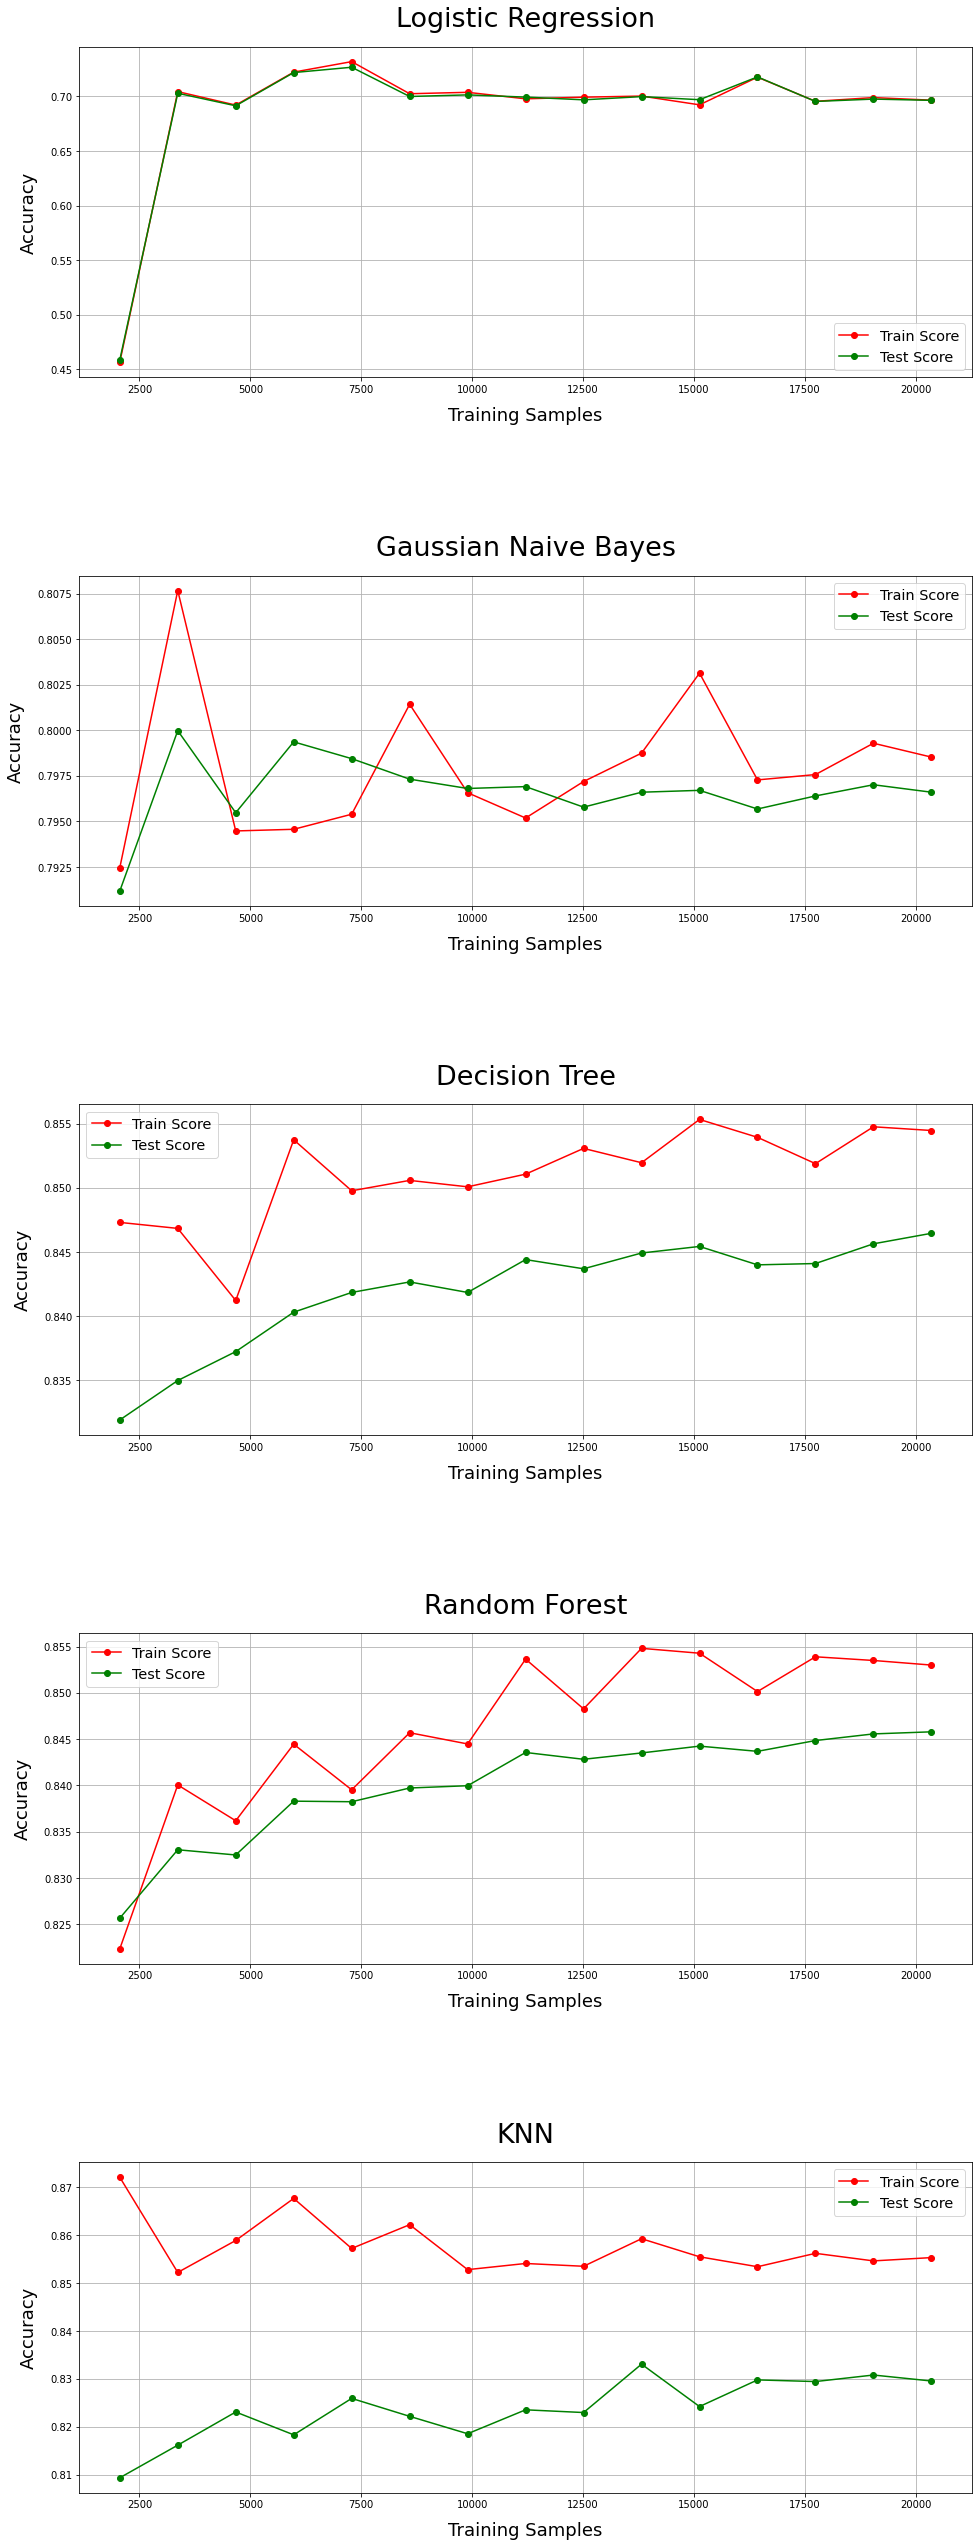

In [99]:
fig, ax = plt.subplots(5, 1, figsize = (16, 45))
plt.subplots_adjust(hspace = 0.6)
trainScore_all = []
testScore_all = []

for i, classifier in enumerate(model):
  trainScore, testScore = getScore(classifier)
  trainScore_all.append(trainScore)
  testScore_all.append(testScore)

  ax[i].set_xlabel('Training Samples', labelpad = 12, fontsize = 18)
  ax[i].set_ylabel('Accuracy', labelpad = 12, fontsize = 18)
  ax[i].set_title(f'{classifier}', pad = 20, fontsize = 27)
  ax[i].grid()

  ax[i].plot(trainSample, trainScore, 'o-', color='r', label = 'Train Score')
  ax[i].plot(trainSample, testScore, 'o-', color='g', label = 'Test Score')
  ax[i].legend(loc = 'best', fontsize = 'x-large')

plt.show()

In [100]:
trainScore_mean = pd.DataFrame(np.mean(np.array(trainScore_all), axis = 1), columns = ['Mean Acc - Train'], index = model)
testScore_mean = pd.DataFrame(np.mean(np.array(testScore_all), axis = 1), columns = ['Mean Acc - Test'], index = model)
pd.concat([trainScore_mean, testScore_mean], axis = 1)

,Mean Acc - Train,Mean Acc - Test
Logistic Regression,0.687476,0.686897
Gaussian Naive Bayes,0.797965,0.796683
Decision Tree,0.851060,0.841963
Random Forest,0.846283,0.840092
KNN,0.857660,0.823793
